In [1]:
#first of all import everything we need. matplot for plotting graphics and seaborn for beautifying it.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [5]:
#you read the the csv data in by specifying the path also

data=pd.read_csv(r'C:\Users\USER\desktop\fortune500.csv')

In [6]:
data.head()

Year  Rank           Company  Revenue (in millions) Profit (in millions)
0  1955     1    General Motors                 9823.5                  806
1  1955     2       Exxon Mobil                 5661.4                584.8
2  1955     3        U.S. Steel                 3250.4                195.4
3  1955     4  General Electric                 2959.1                212.6
4  1955     5            Esmark                 2510.8                 19.1

In [7]:
data.tail()

Year  Rank                Company  Revenue (in millions)  \
25495  2005   496        Wm. Wrigley Jr.                 3648.6   
25496  2005   497         Peabody Energy                 3631.6   
25497  2005   498  Wendy's International                 3630.4   
25498  2005   499     Kindred Healthcare                 3616.6   
25499  2005   500   Cincinnati Financial                 3614.0   

      Profit (in millions)  
25495                  493  
25496                175.4  
25497                 57.8  
25498                 70.6  
25499                  584

In [10]:
data.columns = ['year', 'rank', 'company', 'revenue', 'profit']

In [11]:
len(data)

25500

In [12]:
#you can decide to check the data type just to confirm that all our dataset has been imported as expected

data.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

In [13]:
#oops! as you can see there seems to be an error with the profit as it should be int64 instead of the object.
#so you check for where the error might be.

non_numberic_profits = data.profit.str.contains('[^0-9.-]')
data.loc[non_numberic_profits].head()

year  rank                company  revenue profit
228  1955   229                 Norton    135.0   N.A.
290  1955   291        Schlitz Brewing    100.0   N.A.
294  1955   295  Pacific Vegetable Oil     97.9   N.A.
296  1955   297     Liebmann Breweries     96.0   N.A.
352  1955   353     Minneapolis-Moline     77.4   N.A.

In [15]:
#just as we suspected. it contains strings. check if others have crept in

set(data.profit[non_numberic_profits])

{'N.A.'}

In [16]:
#to make it easier to interpret would be nice to have an idea how many of data is missing

len(data.profit[non_numberic_profits])

369

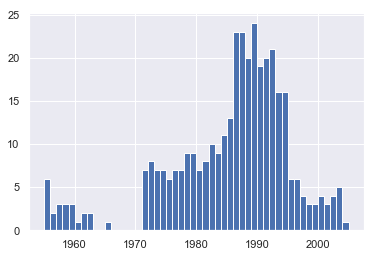

In [22]:
#well It’s a small fraction of our data set, though not completely inconsequential as it is still around 1.5%.
#If rows containing N.A. are, roughly, uniformly distributed over the years, the easiest solution would just be to remove them.

bin_sizes, _, _ = plt.hist(data.year[non_numberic_profits], bins=range(1955, 2006))

In [30]:
#At a glance, we can deduce that the most invalid values in a single year is fewer than 25,
#and as there are 500 data points per year, removing these values would account for less
#than 4% of the data for the worst years.hence, we can go ahead and remove it.


data = data.loc[~non_numberic_profits]
data.profit = data.profit.apply(pd.to_numeric)

In [31]:
#to confirm if this has been applied

len(data)

25131

In [33]:
#you might want to check the data type again

data.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

In [34]:
#Awesome! we are done with our data set up.

In [35]:
#lets try and plot with matplotlib


group_by_year = data.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y = avgs.profit

def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

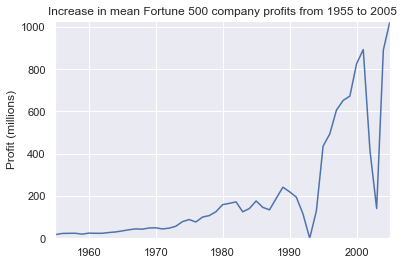

In [37]:
fig, ax = plt.subplots()
plot(x, y, ax, 'Increase in mean Fortune 500 company profits from 1955 to 2005', 'Profit (millions)')

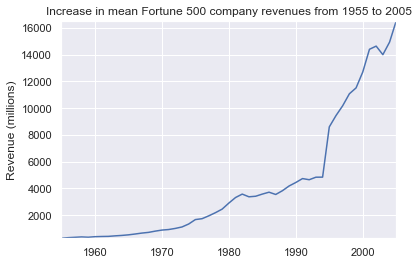

In [38]:
#ooh, looks great, but it’s got some huge dips. must be due to the early 1990s recessio.
#It’s actually nice to see that in the data. But how come profits recovered to even higher levels post each recession?
#the revenues should be able to tell us more.

y2 = avgs.revenue
fig, ax = plt.subplots()
plot(x, y2, ax, 'Increase in mean Fortune 500 company revenues from 1955 to 2005', 'Revenue (millions)')

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


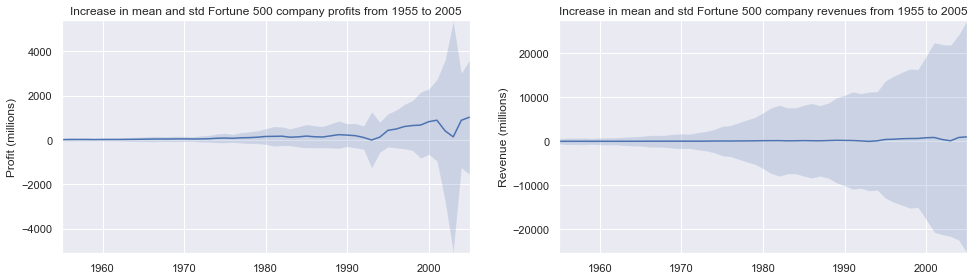

In [40]:
#we can superimpose these plots with +/- their standard deviations. 

def plot_with_std(x, y, stds, ax, title, y_label):
    ax.fill_between(x, y - stds, y + stds, alpha=0.2)
    plot(x, y, ax, title, y_label)

fig, (ax1, ax2) = plt.subplots(ncols=2)
title = 'Increase in mean and std Fortune 500 company %s from 1955 to 2005'
stds1 = group_by_year.std().profit.as_matrix()
stds2 = group_by_year.std().revenue.as_matrix()
plot_with_std(x, y.as_matrix(), stds1, ax1, title % 'profits', 'Profit (millions)')
plot_with_std(x, y.as_matrix(), stds2, ax2, title % 'revenues', 'Revenue (millions)')
fig.set_size_inches(14, 4)
fig.tight_layout()